## Expectation and Maximization_ Gaussian Mixture Mode

## 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from sympy import *
from tabulate import tabulate
from numpy import array, diag, dot, maximum, empty, repeat, ones, sum
from scipy.special import factorial
from scipy.stats import poisson
from scipy.stats import norm, multivariate_normal
from mpl_toolkits import mplot3d

# Q.1

### (a)

$$f(x_i|\theta) = \pi\frac{{\lambda_1}^{x_{i}}}{x_{i}!} \exp(-\lambda_1) + (1-\pi)\frac{{\lambda_2}^{x_i}}{x_i!}\exp(-\lambda_2)$$

$$\theta = (\pi,\lambda_1,\lambda_2)^T$$ 

$$Z = (Z_1, ... , Z_n)^T$$

$$Z_i \overset{iid}{\sim} Binomial(1,\pi)$$

$$L(\theta|X) = \prod_{i=1}^{1096}f(x_i|\theta)$$

$$L(\theta|X,Z) = \prod_{i=1}^{n}\pi^{Z_i} (\frac{{\lambda_1}^{x_i}}{x_i!} \exp(-{\lambda_1}) )^{Z_i} +(1-\pi)^{1-Z_i} (\frac{{\lambda_2}^{x_i}}{x_i!}\exp(-{\lambda_2}) )^{1-Z_i}$$

$$  = \prod_{k=0}^{9}\pi^{m_k} \left(\frac{{\lambda_1}^{x_k}}{x_k!} \exp(-{\lambda_1}) \right)^{m_k} + (1-\pi)^{n_k-m_k}\left(\frac{{\lambda_2}^{x_k}}{x_k!}\exp(-{\lambda_2}) \right)^{n_k-m_k}$$

Where:

n_k is the number of obsereved data in k-th value, and
$$m_k = \sum_{i:X_i=k}^{1} Z_i, k = 0, ..., 9$$

The log-likelihood will be:

$$log(L(\theta|X,Z)) =$$
$$\sum_{k=0}^{9}[m_k(x_klog(\lambda_1)-\lambda_1-log(x_k!))+
(n_k-m_k)(x_klog(\lambda_2)-\lambda_2-log(x_k!))] +$$
$$\sum_{k=0}^{9}[m_klog({\pi})+(n_k-m_k)log(1-\pi)]$$


**E-step:**


$$Q (\theta | \theta^{(t)})= E [log(L(\theta|X,Z))] = E [log(L((\theta|Y)|x,\theta^{(t)}))] = $$

$$ = \sum_{k}^{}n_k (Z_k^{(t)}\log{\pi} + (1-  Z_k^{(t)})\log(1-\pi)) +\sum_{k}^{} n_k Z_k^{(t)}(\log\lambda_1 - \lambda_1) + \sum_{k}^{}n_k(1 - Z_k^{(t)})(\log\lambda_2 - \lambda_2)$$

Where,

$$Z_{k}^{(t)} = \frac{\pi^{(t)}.\frac{{\lambda_{1}^{{(t)}x_k}}}{x_k!}\exp(-\lambda_{1}^{(t)})}{\pi^{(t)}.\frac{{\lambda_{1}^{{(t)}x_k}}}{x_k!}\exp(-\lambda_{1}^{(t)}) + (1 - \pi^{(t)}).\frac{{\lambda_{2}^{{(t)}}x_k}}{x_k!}\exp(-\lambda_{2}^{(t)})}$$


**M_step :**

For maximizing the Expectation we need to:

$$\frac{\nabla(Q (\theta | \theta^{(t)}))}{\nabla(\pi)} = 0$$

$$\frac{\nabla(Q (\theta | \theta^{(t)}))}{\nabla(\lambda_1)} = 0$$

$$\frac{\nabla(Q (\theta | \theta^{(t)}))}{\nabla(\lambda_2)} = 0$$

Then we have:

$$\pi^{(t+1)} = \frac{\sum_{k}{}n_k \pi_k^{(t)}}{n}$$

$$\lambda_1^{(t+1)} = \frac{\sum_{k}{}k n_k \pi_k^{(t)}}{\sum_{k}{}n_k \pi_k^{(t)}}$$

$$\lambda_2^{(t+1)} = \frac{\sum_{k}{}k n_k (1-\pi_k^{(t)})}{\sum_{k}{}n_k (1-\pi_k^{(t)})}$$

### (b)

In [2]:
freq = np.array([162,267,271,185,111,61,27,8,3,1])
value = np.arange(0,10)

In [3]:
def EM(freq,value,init,eps):
    itr=0
    R=1
    header=['Iteration','\u03C0\u207D\u1d57\u207E', '\u03BB1\u207D\u1d57\u207E',
            '\u03BB2\u207D\u1d57\u207E','R', 'D_\u03C0', 'D_\u03BB1','D_\u03BB2']
    if itr==0:
        table = [[itr,init[0],init[1],init[2],None,None,None,None]]
        print(tabulate(table,headers=header))
    
    while R > eps:
        init0 = init.copy()
        Eexpect_Z = freq*init[0]*poisson.pmf(value, init[1])/(init[0]*poisson.pmf(value, init[1])
                                                              +(1-init[0])*poisson.pmf(value, init[2]))
        init[0] = sum(Eexpect_Z)/sum(freq)
        init[1] = sum(Eexpect_Z*value)/sum(Eexpect_Z)
        init[2] = sum((freq-Eexpect_Z)*value)/sum(freq-Eexpect_Z)
        R = np.sqrt(sum((init[0:2]-init0[0:2])**2))/np.sqrt(sum(init0[0:2]**2))
        D_P = (init[0] - 0.36059727) / (init0[0] - 0.36059727)
        D_lambda_1 = (init[1] - 1.25733152) / (init0[1] - 1.25733152)
        D_lambda_2 = (init[2] - 2.66427388) / (init0[2] - 2.66427388)
        itr+=1
        table = [[itr,init[0],init[1],init[2],R,D_P,D_lambda_1,D_lambda_2]]
        print(tabulate(table,headers=header))
        
    return init

In [4]:
init = np.array([.5,1,2])
prob = EM(freq,value,init,0.00001)

  Iteration    π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾  R    D_π    D_λ1    D_λ2
-----------  ------  -------  -------  ---  -----  ------  ------
          0     0.5        1        2
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾         R       D_π       D_λ1        D_λ2
-----------  --------  -------  -------  --------  --------  ---------  ----------
          1  0.411515  1.35315    2.719  0.325631  0.365259  -0.372354  -0.0823915
  Iteration     π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾           R       D_π      D_λ1     D_λ2
-----------  -------  -------  -------  ----------  --------  --------  -------
          2  0.41148  1.34965  2.72137  0.00247146  0.999307  0.963522  1.04316
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾           R       D_π      D_λ1    D_λ2
-----------  --------  -------  -------  ----------  --------  --------  ------
          3  0.411396  1.34703  2.72301  0.00186124  0.998348  0.971569  1.0287
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾           R       D_π     D_λ1    D_λ2
-----------  --------  -

        107  0.393338  1.31204  2.70473  0.00019667  0.995678  0.995833  0.995623
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π      D_λ1      D_λ2
-----------  --------  -------  -------  -----------  --------  --------  --------
        108  0.393196  1.31181  2.70456  0.000195937  0.995677  0.995832  0.995623
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π      D_λ1      D_λ2
-----------  --------  -------  -------  -----------  --------  --------  --------
        109  0.393055  1.31158  2.70438  0.000195206  0.995676  0.995831  0.995622
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π      D_λ1      D_λ2
-----------  --------  -------  -------  -----------  --------  --------  --------
        110  0.392915  1.31136   2.7042  0.000194478  0.995675  0.995829  0.995622
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π      D_λ1      D_λ2
-----------  --------  -------  -------  -----------  --------  --------  --------
     

        183  0.384096    1.297  2.69321  0.00014721  0.995613  0.99573  0.995576
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π      D_λ1      D_λ2
-----------  --------  -------  -------  -----------  --------  --------  --------
        184  0.383993  1.29683  2.69308  0.000146639  0.995613  0.995729  0.995575
  Iteration     π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾           R       D_π      D_λ1      D_λ2
-----------  -------  -------  -------  ----------  --------  --------  --------
        185  0.38389  1.29667  2.69296  0.00014607  0.995612  0.995727  0.995574
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π      D_λ1      D_λ2
-----------  --------  -------  -------  -----------  --------  --------  --------
        186  0.383788   1.2965  2.69283  0.000145503  0.995611  0.995726  0.995574
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R      D_π      D_λ1      D_λ2
-----------  --------  -------  -------  -----------  -------  --------  --------
        187  0

        286  0.375463  1.28268  2.68252  9.78486e-05  0.995511  0.995589  0.995488
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R      D_π      D_λ1      D_λ2
-----------  --------  -------  -------  -----------  -------  --------  --------
        287  0.375396  1.28257  2.68244  9.74543e-05  0.99551  0.995587  0.995487
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π      D_λ1      D_λ2
-----------  --------  -------  -------  -----------  --------  --------  --------
        288  0.375329  1.28245  2.68236  9.70614e-05  0.995509  0.995586  0.995486
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π      D_λ1      D_λ2
-----------  --------  -------  -------  -----------  --------  --------  --------
        289  0.375263  1.28234  2.68228  9.66701e-05  0.995508  0.995584  0.995485
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π      D_λ1      D_λ2
-----------  --------  -------  -------  -----------  --------  --------  --------
       

        400  0.369422  1.27249  2.67509  6.1326e-05  0.995351  0.9954  0.995337
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π      D_λ1      D_λ2
-----------  --------  -------  -------  -----------  --------  --------  --------
        401  0.369381  1.27242  2.67504  6.10719e-05  0.995349  0.995398  0.995336
  Iteration     π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π      D_λ1      D_λ2
-----------  -------  -------  -------  -----------  --------  --------  --------
        402  0.36934  1.27235  2.67499  6.08188e-05  0.995348  0.995396  0.995334
  Iteration    π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π      D_λ1      D_λ2
-----------  ------  -------  -------  -----------  --------  --------  --------
        403  0.3693  1.27228  2.67494  6.05668e-05  0.995346  0.995394  0.995332
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π      D_λ1      D_λ2
-----------  --------  -------  -------  -----------  --------  --------  --------
        404  0.3

        502  0.366024  1.26669  2.67092  4.00108e-05  0.995123  0.995154  0.995114
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R      D_π      D_λ1      D_λ2
-----------  --------  -------  -------  -----------  -------  --------  --------
        503  0.365998  1.26664  2.67088  3.98424e-05  0.99512  0.995151  0.995111
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π      D_λ1      D_λ2
-----------  --------  -------  -------  -----------  --------  --------  --------
        504  0.365972   1.2666  2.67085  3.96747e-05  0.995117  0.995148  0.995109
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π      D_λ1      D_λ2
-----------  --------  -------  -------  -----------  --------  --------  --------
        505  0.365945  1.26655  2.67082  3.95076e-05  0.995114  0.995145  0.995106
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π      D_λ1      D_λ2
-----------  --------  -------  -------  -----------  --------  --------  --------
       

        601  0.363885  1.26301   2.6683  2.62932e-05  0.994749  0.994769  0.994743
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π      D_λ1      D_λ2
-----------  --------  -------  -------  -----------  --------  --------  --------
        602  0.363868  1.26299  2.66827  2.61814e-05  0.994744  0.994764  0.994738
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π      D_λ1      D_λ2
-----------  --------  -------  -------  -----------  --------  --------  --------
        603  0.363851  1.26296  2.66825  2.60701e-05  0.994739  0.994759  0.994733
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π      D_λ1      D_λ2
-----------  --------  -------  -------  -----------  --------  --------  --------
        604  0.363834  1.26293  2.66823  2.59592e-05  0.994733  0.994754  0.994728
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π      D_λ1      D_λ2
-----------  --------  -------  -------  -----------  --------  --------  --------
    

        699  0.362501  1.26063   2.6666  1.72926e-05  0.994067  0.994081  0.994064
  Iteration     π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π      D_λ1      D_λ2
-----------  -------  -------  -------  -----------  --------  --------  --------
        700  0.36249  1.26061  2.66659  1.72186e-05  0.994058  0.994071  0.994054
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π      D_λ1      D_λ2
-----------  --------  -------  -------  -----------  --------  --------  --------
        701  0.362479  1.26059  2.66657  1.71449e-05  0.994048  0.994061  0.994044
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π      D_λ1      D_λ2
-----------  --------  -------  -------  -----------  --------  --------  --------
        702  0.362468  1.26057  2.66656  1.70715e-05  0.994038  0.994052  0.994035
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π      D_λ1      D_λ2
-----------  --------  -------  -------  -----------  --------  --------  --------
       

        795  0.361611  1.25909  2.66551  1.14455e-05  0.992654  0.992663  0.992651
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π     D_λ1      D_λ2
-----------  --------  -------  -------  -----------  --------  -------  --------
        796  0.361603  1.25908   2.6655  1.13963e-05  0.992631  0.99264  0.992629
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π      D_λ1      D_λ2
-----------  --------  -------  -------  -----------  --------  --------  --------
        797  0.361596  1.25906  2.66549  1.13473e-05  0.992609  0.992618  0.992606
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π      D_λ1      D_λ2
-----------  --------  -------  -------  -----------  --------  --------  --------
        798  0.361588  1.25905  2.66549  1.12985e-05  0.992586  0.992595  0.992584
  Iteration      π⁽ᵗ⁾    λ1⁽ᵗ⁾    λ2⁽ᵗ⁾            R       D_π      D_λ1      D_λ2
-----------  --------  -------  -------  -----------  --------  --------  --------
       

### EM algorithm results

In [5]:
prob

array([0.36138707, 1.25870081, 2.66523904])

### (C)

In [6]:
f = prob[0]*poisson.pmf(value, prob[1])+(1-prob[0])*poisson.pmf(value, prob[2])

Text(0, 0.5, '$Probability$')

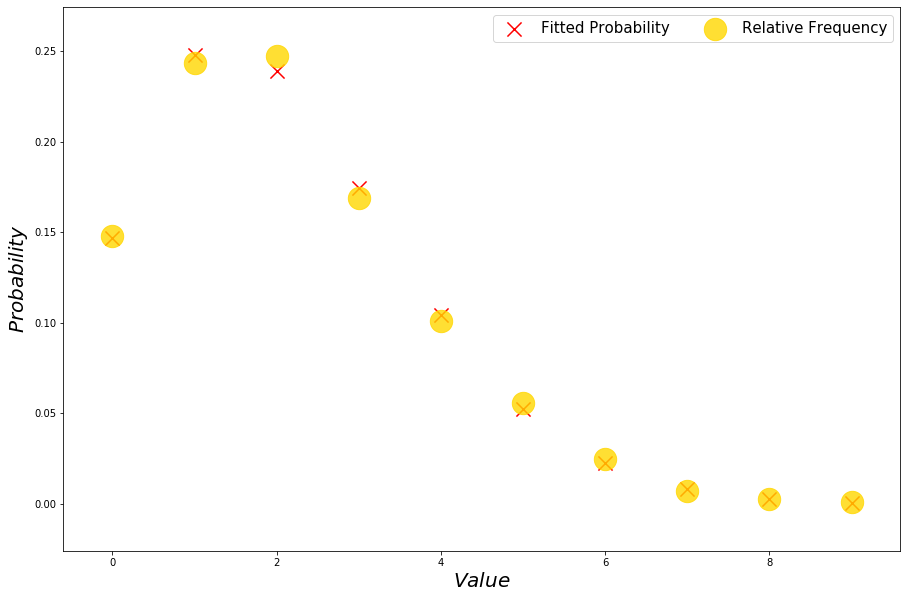

In [7]:
plt.figure(figsize=(15,10))
fitted = plt.scatter(value,f, s=200, marker='x', c="r")
relative = plt.scatter(value, freq/sum(freq), s=500, marker='o', alpha=0.8,c="gold")
plt.legend((fitted, relative),
           ('Fitted Probability', 'Relative Frequency'),
           scatterpoints=1,
           loc='upper right',
           ncol=2,
           fontsize=15)
plt.xlabel('$Value$',weight='bold',fontsize=20)
plt.ylabel('$Probability$',weight='bold',fontsize=20)

### (d)

#### Probability that the vaue 10 will be observed

In [8]:
prob[0]*poisson.pmf(10, prob[1])+(1-prob[0])*poisson.pmf(10, prob[2])

0.00022176398851252833

# Q. 2

### Read the data

In [9]:
data = pd.read_csv('data_mvnorm2mix.csv')
X = np.array(data)

### Gaussian Mixture Model

In [10]:
def GMM(X,p,mu1,mu2,sgma1,sgma2,nitr):
    resp = np.zeros((len(X), 2))
    log_likelihood = np.zeros((nitr, 1))
    for i in range(nitr):
        f = p[0]*multivariate_normal(mu1,sgma1).pdf(X)+p[1]*multivariate_normal(mu2,sgma2).pdf(X)
        z1 = (p[0])*multivariate_normal(mu1,sgma1).pdf(X)/f
        z2 = (p[1])*multivariate_normal(mu2,sgma2).pdf(X)/f
        p[0] = sum(z1)/len(X)
        p[1] = sum(z2)/len(X)
        mu1 = np.dot(z1.T,X)/sum(z1)
        mu2 = np.dot(z2.T,X)/sum(z2)
        sgma1 = np.dot(z1*(X-mu1).T,(X-mu1))/sum(z1)
        sgma2 = np.dot(z2*(X-mu2).T,(X-mu2))/sum(z2)
        resp[:, 0] = p[0] * multivariate_normal(mu1, sgma1).pdf(X)
        resp[:, 1] = p[1] * multivariate_normal(mu2, sgma2).pdf(X)    
        log_likelihood[i] = np.sum(np.log(np.sum(resp, axis = 1)))
    return p,mu1,mu2,sgma1,sgma2,log_likelihood      
        

# (a)

### Initial Values

In [11]:
p = np.array([0.25,0.75])
mu1 = np.array([-1,1])
mu2 = np.array([4,5])
sgma1 = np.array([[5,.3],[.3,3.5]])
sgma2 = np.array([[0.8,-.5],[-.5,1.5]])

In [12]:
p,mu1,mu2,sgma1,sgma2, log_likelihood = GMM(X,p,mu1,mu2,sgma1,sgma2,100)

### MLE of the parameters

In [13]:
print('MLE of p:',p)
print('MLE of the first mean:',mu1)
print('MLE of the second mean:',mu2)

MLE of p: [0.30812007 0.69187993]
MLE of the first mean: [-2.0044957   0.02217512]
MLE of the second mean: [1.97673277 1.15430445]


In [14]:
print('MLE of the first standard deviation:')
sgma1

MLE of the first standard deviation:


array([[2.01010171, 0.35373339],
       [0.35373339, 0.54006335]])

In [15]:
print('MLE of the second standard deviation:')
sgma2

MLE of the second standard deviation:


array([[ 0.84339551, -0.66309604],
       [-0.66309604,  1.50319884]])

# (b)

### Log-likelihood plot

Text(0, 0.5, 'Log-Likelihood')

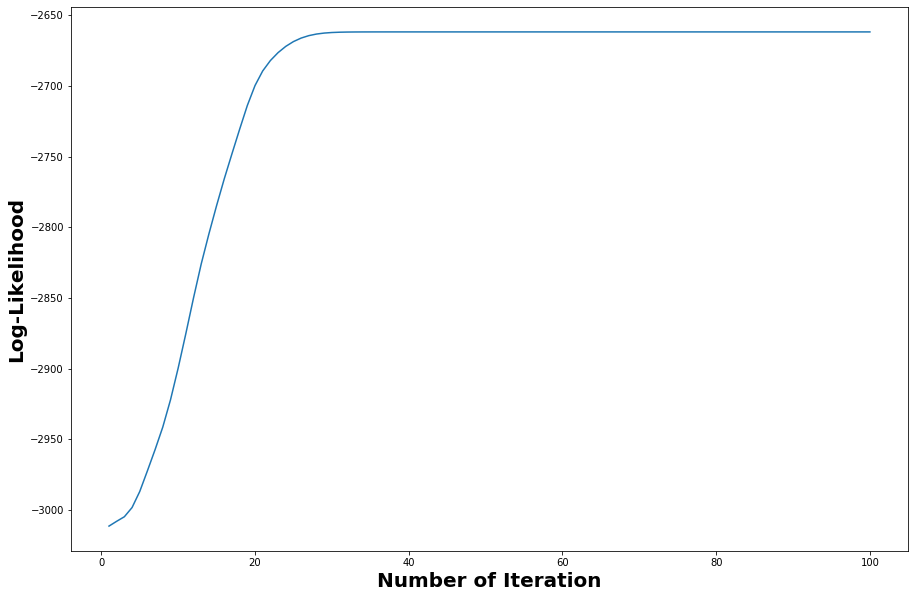

In [16]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(1,101,1),log_likelihood)
plt.xlabel('Number of Iteration',weight='bold',fontsize=20)
plt.ylabel('Log-Likelihood',weight='bold',fontsize=20)

### Log-likelihood continuously increases untill reaches the maximum.

# (C)

### Classifing the data set to two classes according to the above GMM estimates

In [17]:
resp1 = p[0]*multivariate_normal(mu1, sgma1).pdf(X)
resp2 = p[1]*multivariate_normal(mu2, sgma2).pdf(X)
u = resp1/resp2
class1 = X[np.where(u<1)]
class2 = X[np.where(u>=1)]

### Plotting the classification results

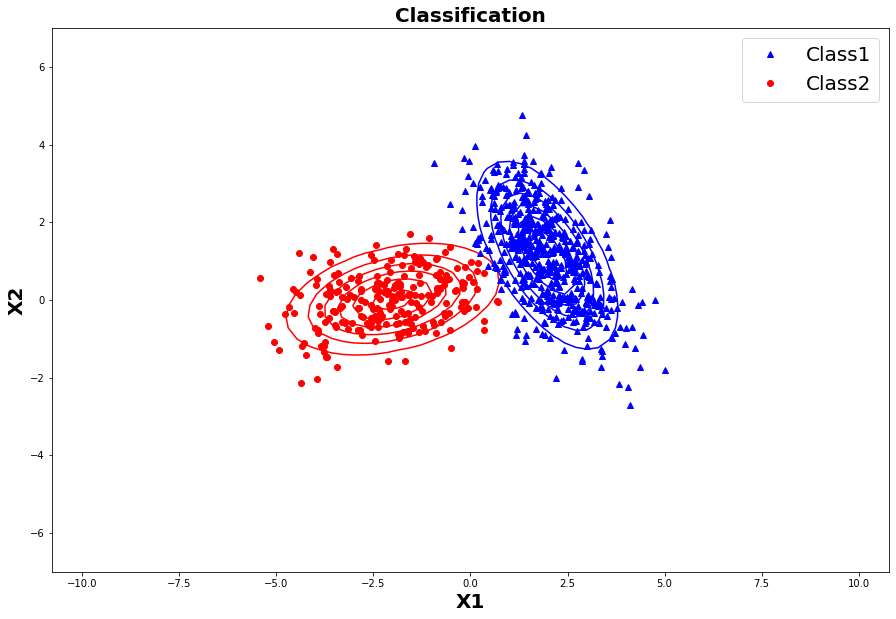

In [18]:
plt.figure(figsize=(15,10))
plt.plot(class1[:,0],class1[:,1], 'b^')
plt.plot(class2[:,0],class2[:,1], 'ro')
plt.axis('equal')
plt.xlabel('X1',weight='bold',fontsize=20)
plt.ylabel('X2',weight='bold',fontsize=20)
plt.title('Classification',weight='bold',fontsize=20)
plt.legend(['Class1','Class2'],fontsize=20)

x, y = np.meshgrid(np.linspace(-7, 7), np.linspace(-7,7))
t = np.column_stack((x.reshape(len(x)**2,1),y.reshape(len(y)**2,1)))
f1 = multivariate_normal(mu1,sgma1).pdf(t)
f2 = multivariate_normal(mu2,sgma2).pdf(t)
z1 = f1.reshape((len(x),len(x)))
z2 = f2.reshape((len(x),len(x)))
plt.contour(x, y, z1,linewidths=1.5, colors='r')
plt.contour(x, y, z2,linewidths=1.5, colors='b')
plt.show()

# (d)

### Surface plot

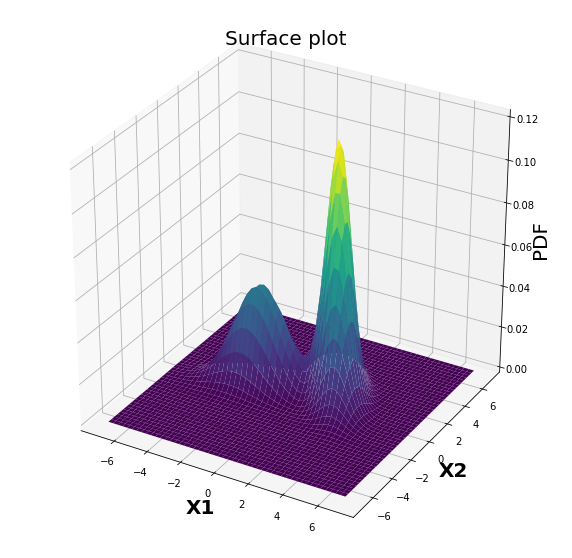

In [19]:
x, y = np.meshgrid(np.linspace(-7, 7), np.linspace(-7,7))
t = np.column_stack((x.reshape(len(x)**2,1),y.reshape(len(y)**2,1)))
f = p[0]*multivariate_normal(mu1,sgma1).pdf(t)+p[1]*multivariate_normal(mu2,sgma2).pdf(t)
z = f.reshape((len(x),len(x)))
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
plt.xlabel('X1',weight='bold',fontsize=20)
plt.ylabel('X2',weight='bold',fontsize=20)
ax.set_zlabel('PDF', fontsize=20, rotation=90)
ax.set_title('Surface plot',fontsize=20)
plt.show()